#### Challenge

you'll use this dataset of article open-access prices paid by the WELLCOME Trust between 2012 and 2013.

* You may may want to look into data encoding methods  https://stackoverflow.com/questions/2241348/what-is-unicode-utf-8-utf-16

* For a real bonus round, identify the open access prices paid by subject area.


Unicode is a standard which maps the characters in all languages to a particular numeric value called Code Points. The reason it does this is that it allows different encodings to be possible using the same set of code points.

UTF-8 and UTF-16 are two such encodings. They take code points as input and encodes them using some well-defined formula to produce the encoded string.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# solve the issue of unicode by using encoding = 'unicode_escape'

data = pd.read_csv('datasets/WELLCOME_APCspend2013_forThinkful.csv', encoding = 'unicode_escape') 

data.info()

# notice that all the data here is in object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2127 entries, 0 to 2126
Data columns (total 5 columns):
PMID/PMCID                                             1928 non-null object
Publisher                                              2127 non-null object
Journal title                                          2126 non-null object
Article title                                          2127 non-null object
COST (£) charged to Wellcome (inc VAT when charged)    2127 non-null object
dtypes: object(5)
memory usage: 83.2+ KB


In [3]:
# Renaming columns so we can work better with it
# DataFrame.rename(self, mapper=None, index=None, columns=None, axis=None, copy=True, inplace=False, level=None, errors='ignore')
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

data.rename(columns = {'PMID/PMCID':'PMC_ID', 'Journal title':'journal_title', 'Article title':'article_title','COST (£) charged to Wellcome (inc VAT when charged)':'cost_in_Pounds'},inplace=True)

In [4]:
#lowercase all string so we can group by correctly

data['Publisher'] = data['Publisher'].str.lower()
data['journal_title'] = data['journal_title'].str.lower()
data['article_title'] = data['article_title'].str.lower()

In [ ]:
#data.head(5)

In [5]:
# eliminating the pound sign so we can do calculation with that column

# this is one way of doing this but there may be an issue - like what if the first char is not pound sign
#data['cost_in_Pounds'] = data['cost_in_Pounds'].str[1:]

# apply should work but for some reason did not work here - still a valid syntax
#data["journal_title"] = data["journal_title"].apply(str.strip).replace("£", "")

data["cost_in_Pounds"] = data["cost_in_Pounds"].str.replace("£", "")

# eliminating the $ so we can do calculation with that column
data["cost_in_Pounds"] = data["cost_in_Pounds"].str.replace("$", "")


In [6]:
data.head(5)

,PMC_ID,Publisher,journal_title,article_title,cost_in_Pounds
0,NaN,cup,psychological medicine,reduced parahippocampal cortical thickness in ...,0.00
1,PMC3679557,acs,biomacromolecules,structural characterization of a model gram-ne...,2381.04
2,23043264 PMC3506128,acs,j med chem,"fumaroylamino-4,5-epoxymorphinans and related ...",642.56
3,23438330 PMC3646402,acs,j med chem,orvinols with mixed kappa/mu opioid receptor a...,669.64
4,23438216 PMC3601604,acs,j org chem,regioselective opening of myo-inositol orthoes...,685.88


In [7]:
# convert cost in pounds to float
#data['cost_in_Pounds'] = data['cost_in_Pounds'].astype(float)

data['cost_in_Pounds'] = pd.to_numeric(data['cost_in_Pounds'], downcast="float")

In [ ]:
# chacking that all cost in pounds values are numbers

#data["cost_in_Pounds"].mean()

In [8]:
data.head(10)

,PMC_ID,Publisher,journal_title,article_title,cost_in_Pounds
0,NaN,cup,psychological medicine,reduced parahippocampal cortical thickness in ...,0.000000
1,PMC3679557,acs,biomacromolecules,structural characterization of a model gram-ne...,2381.040039
2,23043264 PMC3506128,acs,j med chem,"fumaroylamino-4,5-epoxymorphinans and related ...",642.559998
3,23438330 PMC3646402,acs,j med chem,orvinols with mixed kappa/mu opioid receptor a...,669.640015
4,23438216 PMC3601604,acs,j org chem,regioselective opening of myo-inositol orthoes...,685.880005
5,PMC3579457,acs,journal of medicinal chemistry,comparative structural and functional studies ...,2392.199951
6,PMC3709265,acs,journal of proteome research,mapping proteolytic processing in the secretom...,2367.949951
7,23057412 PMC3495574,acs,mol pharm,quantitative silencing of egfp reporter gene b...,649.330017
8,PMCID: PMC3780468,acs (amercian chemical society) publications,acs chemical biology,a novel allosteric inhibitor of the uridine di...,1294.589966
9,PMCID: PMC3621575,acs (amercian chemical society) publications,acs chemical biology,chemical proteomic analysis reveals the drugab...,1294.780029


In [9]:
# checking to see if values are null
data.isnull()

,PMC_ID,Publisher,journal_title,article_title,cost_in_Pounds
0,True,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [10]:
# check to see the % of nulls in each column
data.isnull().sum()*100/data.isnull().count()

# Check to see how many values are there in each column - value_counts eliminates NaNs
#data.journal_title.value_counts()

PMC_ID            9.355900
Publisher         0.000000
journal_title     0.047015
article_title     0.000000
cost_in_Pounds    0.000000
dtype: float64

###  To complete this challenge, determine the five most common journals and the total articles for each. 


In [11]:
# how many journals are there
data['journal_title'].count()

2126

In [12]:
# how many distinct journals are there

data['journal_title'].nunique()

# This gives the same number of journals as data['journal_title'].value_counts() #928

928

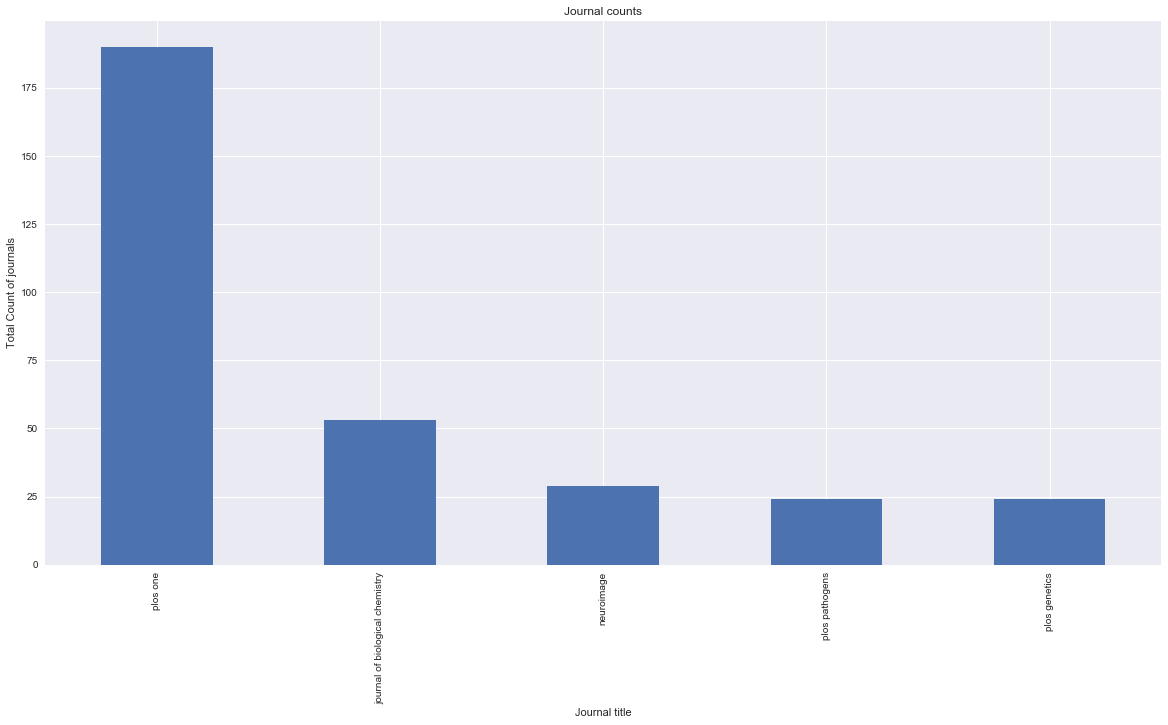

In [13]:
#plt.bar(x_pos, Y_pos, color='green')
#plt.xlabel("X")
#plt.ylabel("Y")
#plt.title("Title")

# value_count already takes care of NANs 

data.journal_title.value_counts().head(5).plot(kind='bar', figsize=(20, 10))
plt.title('Journal counts')
plt.xlabel('Journal title')
plt.ylabel('Total Count of journals')


In [15]:
#data.groupby(['journal_title',])['article_title'].count()


### Next, calculate the mean, median, and standard deviation of the open-access cost per article for each journal.

In [16]:
data.describe()

,cost_in_Pounds
count,2127.000000
mean,24067.367188
std,146860.437500
min,0.000000
25%,1280.000000
50%,1884.010010
75%,2321.304932
max,999999.000000


In [17]:
data['cost_in_Pounds'].median()

1884.010009765625

In [22]:
# data.groupby(['journal_title']).count() # to check how many articles are there

In [18]:
data.groupby(['journal_title']).mean()

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,2379.540039
acs chemical biology,1418.186035
acs chemical neuroscience,1186.800049
acs nano,668.140015
"acta crystallographica section d, biological crystallography",771.419983
acta crystallographica section d: biological crystallography,773.739990
acta crystallographica section f: structural biology and crystallization communications,796.635010
"acta crystallographica, section d",757.179993
acta crystallography d,774.190002


In [19]:
data.groupby(['journal_title']).median()

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,2379.540039
acs chemical biology,1294.589966
acs chemical neuroscience,1186.800049
acs nano,668.140015
"acta crystallographica section d, biological crystallography",771.419983
acta crystallographica section d: biological crystallography,773.739990
acta crystallographica section f: structural biology and crystallization communications,796.635010
"acta crystallographica, section d",757.179993
acta crystallography d,774.190002


In [24]:
#data.groupby(['journal_title']).std(ddof=0)

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html ddof by default is 1

#data.groupby(['journal_title']).std()
# since we are using population and not sample, we should use ddof = 0 and not the default 1

data.groupby(['journal_title']).std(ddof=0)

# try np std dev and see what happens... check to see if the ddof of no.std() is 0 by default

,cost_in_Pounds
journal_title,
academy of nutrition and dietetics,0.000000
acs chemical biology,453.751434
acs chemical neuroscience,0.000000
acs nano,25.250000
"acta crystallographica section d, biological crystallography",0.000000
acta crystallographica section d: biological crystallography,0.000000
acta crystallographica section f: structural biology and crystallization communications,11.035004
"acta crystallographica, section d",0.000000
acta crystallography d,0.000000
